In [2]:
import pandas as pd
import os
import numpy as np
import pubchempy as pcp
import json
from tqdm.notebook import tqdm


from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit.Chem import AllChem

In [6]:
# drugs_set = set()
# for dset in ["A", "B", "C", "D"]:
#     df = pd.read_csv("../processed_data/driams_{}_long_table.csv".format(dset))
#     df_drugs = df["drug"].unique()
#     drugs_set.update(df_drugs)
# drugs_set = sorted(list(drugs_set))
# len(drugs_set)

df = pd.read_csv("../processed_data/DRIAMS_combined_long_table.csv")
drugs_set = df["drug"].unique()
drugs_set = sorted(list(drugs_set))
df

,species,sample_id,drug,response,dataset
0,Staphylococcus epidermidis,e9adf43d-679b-497c-9849-1fa214838dd3,Meropenem,1,A
1,Staphylococcus epidermidis,e9adf43d-679b-497c-9849-1fa214838dd3,Ciprofloxacin,1,A
2,Staphylococcus epidermidis,e9adf43d-679b-497c-9849-1fa214838dd3,Cefepime,1,A
3,Staphylococcus epidermidis,e9adf43d-679b-497c-9849-1fa214838dd3,Cotrimoxazole,0,A
4,Staphylococcus epidermidis,e9adf43d-679b-497c-9849-1fa214838dd3,Imipenem,1,A
...,...,...,...,...,...
652766,Staphylococcus aureus,08bc8410-51ec-46d7-ac7b-afba9e6ba2cd_3313,Linezolid,0,D
652767,Staphylococcus aureus,08bc8410-51ec-46d7-ac7b-afba9e6ba2cd_3313,Rifampicin,0,D
652768,Staphylococcus aureus,08bc8410-51ec-46d7-ac7b-afba9e6ba2cd_3313,Tetracycline,0,D
652769,Staphylococcus aureus,08bc8410-51ec-46d7-ac7b-afba9e6ba2cd_3313,Tigecycline,0,D


In [7]:
# samples_set = set()
# for dset in ["A", "B", "C", "D"]:
#     df = pd.read_csv("../processed_data/driams_{}_long_table.csv".format(dset))
#     df_samples = df["sample_id"].unique()
#     print(dset, len(df_samples))
#     samples_set.update(df_samples)
# samples_set = sorted(list(samples_set))
# len(samples_set)

In [8]:
drugs_set

['5-Fluorocytosine',
 'Amikacin',
 'Aminoglycosides',
 'Amoxicillin',
 'Amphotericin B',
 'Ampicillin',
 'Anidulafungin',
 'Azithromycin',
 'Aztreonam',
 'Bacitracin',
 'Benzylpenicillin',
 'Caspofungin',
 'Cefazolin',
 'Cefepime',
 'Cefixime',
 'Cefotaxime',
 'Cefoxitin',
 'Cefpodoxime',
 'Ceftarolin',
 'Ceftazidime',
 'Ceftobiprole',
 'Ceftriaxone',
 'Cefuroxime',
 'Chloramphenicol',
 'Ciprofloxacin',
 'Clarithromycin',
 'Clindamycin',
 'Colistin',
 'Cotrimoxazol',
 'Cotrimoxazole',
 'Daptomycin',
 'Doxycycline',
 'Ertapenem',
 'Erythromycin',
 'Fluconazole',
 'Fosfomycin',
 'Fusidic acid',
 'Gentamicin',
 'Imipenem',
 'Isavuconazole',
 'Itraconazole',
 'Levofloxacin',
 'Linezolid',
 'Meropenem',
 'Metronidazole',
 'Micafungin',
 'Minocycline',
 'Moxifloxacin',
 'Mupirocin',
 'Nitrofurantoin',
 'Norfloxacin',
 'Novobiocin',
 'Ofloxacin',
 'Oxacillin',
 'Penicillin',
 'Piperacillin',
 'Polymyxin B',
 'Posaconazole',
 'Quinolones',
 'Rifampicin',
 'Teicoplanin',
 'Telithromycin',
 'Tet

In [9]:
# antibiotics_data = pd.read_csv("../data/41591_2021_1619_MOESM3_ESM.csv")
# antibiotics_data

In [10]:
# antibiotics = antibiotics_data["antibiotic"]

In [11]:
# antibiotics_names = list(set([a.split("_")[0] for a in antibiotics]))

In [12]:
# antibiotics_names

In [13]:
results = pcp.get_compounds(drugs_set[0], 'name')
results

[Compound(3366)]

In [16]:
name2cid = {}
name2smiles = {}
name2pcp_fp = {}

structure2d = {}
not_found = []
for i, an in enumerate(drugs_set):
    results = pcp.get_compounds(an, 'name')
    if len(results)<1:
        not_found.append(an)
        continue
    #     print(results)
    r = results[0]
    name2cid[an] = r.cid
    name2smiles[an] = r.canonical_smiles
    
    name2pcp_fp[an] = bin(int(r.fingerprint, 16))[2:]
    
    structure2d[an] = {"cid": r.record["id"]["id"]["cid"], "atoms": r.record["atoms"],
                       "bonds": r.record["bonds"]}


Exception ignored in: <bound method tqdm.__del__ of <tqdm.notebook.tqdm_notebook object at 0x7f5281aabf98>>
Traceback (most recent call last):
  File "/home/gvisona/miniconda3/envs/chem/lib/python3.6/site-packages/tqdm/std.py", line 1162, in __del__
    self.close()
  File "/home/gvisona/miniconda3/envs/chem/lib/python3.6/site-packages/tqdm/notebook.py", line 291, in close
    self.disp(bar_style='success', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


In [17]:
not_found

['Aminoglycosides', 'Bacitracin', 'Ceftarolin']

In [18]:
# Manual matching

# mm_drugs = ["amoxicillin", "clavulanic acid", "fosfomycin", "trometamol", "aminoglycosides", "ampicillin"]
# cids = [33613, 5280980, 446987, 6503, 91896577, 6249]

mm_drugs = ['Aminoglycosides', 'Bacitracin', 'Ceftarolin']
cids = [91896577, 11980094, 9852981]

for dname, cid in zip(mm_drugs, cids):
    r = pcp.Compound.from_cid(cid)
    
    name2cid[an] = r.cid
    name2smiles[an] = r.canonical_smiles
    name2pcp_fp[an] = bin(int(r.fingerprint, 16))[2:]
    
    
    structure2d[an] = {"cid": r.record["id"]["id"]["cid"], "atoms": r.record["atoms"],
                       "bonds": r.record["bonds"]}


In [19]:
with open("../data/drugs_2d_structure.json", "w") as f:
    json.dump(structure2d, f, indent=2)

In [20]:
with open("../data/drug_name2cid.json", "w") as f:
    json.dump(name2cid, f, indent=2)

In [21]:
with open("../data/drug_name2smiles.json", "w") as f:
    json.dump(name2smiles, f, indent=2)

In [22]:
name2smiles

{'5-Fluorocytosine': 'C1=NC(=O)NC(=C1F)N',
 'Amikacin': 'C1C(C(C(C(C1NC(=O)C(CCN)O)OC2C(C(C(C(O2)CO)O)N)O)O)OC3C(C(C(C(O3)CN)O)O)O)N',
 'Amoxicillin': 'CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=C(C=C3)O)N)C(=O)O)C',
 'Amphotericin B': 'CC1C=CC=CC=CC=CC=CC=CC=CC(CC2C(C(CC(O2)(CC(CC(C(CCC(CC(CC(=O)OC(C(C1O)C)C)O)O)O)O)O)O)O)C(=O)O)OC3C(C(C(C(O3)C)O)N)O',
 'Ampicillin': 'CC1(C(N2C(S1)C(C2=O)NC(=O)C(C3=CC=CC=C3)N)C(=O)O)C',
 'Anidulafungin': 'CCCCCOC1=CC=C(C=C1)C2=CC=C(C=C2)C3=CC=C(C=C3)C(=O)NC4CC(C(NC(=O)C5C(C(CN5C(=O)C(NC(=O)C(NC(=O)C6CC(CN6C(=O)C(NC4=O)C(C)O)O)C(C(C7=CC=C(C=C7)O)O)O)C(C)O)C)O)O)O',
 'Azithromycin': 'CCC1C(C(C(N(CC(CC(C(C(C(C(C(=O)O1)C)OC2CC(C(C(O2)C)O)(C)OC)C)OC3C(C(CC(O3)C)N(C)C)O)(C)O)C)C)C)O)(C)O',
 'Aztreonam': 'CC1C(C(=O)N1S(=O)(=O)O)NC(=O)C(=NOC(C)(C)C(=O)O)C2=CSC(=N2)N',
 'Benzylpenicillin': 'CC1(C(N2C(S1)C(C2=O)NC(=O)CC3=CC=CC=C3)C(=O)O)C',
 'Caspofungin': 'CCC(C)CC(C)CCCCCCCCC(=O)NC1CC(C(NC(=O)C2C(CCN2C(=O)C(NC(=O)C(NC(=O)C3CC(CN3C(=O)C(NC1=O)C(C)O)O)C(C(C4=CC=C(C=C4)O

# Convert SMILES to fingerprints

In [15]:
with open("../data/drug_name2smiles.json", "r") as f:
    name2smiles = json.load(f)

In [43]:
fp_df = []

for dname, d_smiles in tqdm(name2smiles.items()):
    mol = Chem.MolFromSmiles(d_smiles)
    maccs_fp = MACCSkeys.GenMACCSKeys(mol).ToBitString() # 167-dim key
   
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=512).ToBitString()
    pcp_fp = name2pcp_fp[dname]
    
    
    fp_df.append({"drug": dname, "MACCS_fp": maccs_fp, "mogan_fp": morgan_fp, "pubchem_fp": pcp_fp})
fp_df = pd.DataFrame(fp_df)
fp_df
    

  0%|          | 0/65 [00:00<?, ?it/s]

,drug,MACCS_fp,mogan_fp,pubchem_fp
0,5-Fluorocytosine,0000000000000000000000000000000000000110001100...,0000000000000000000000000000000000000000000000...,1101110001100000000110001100100001000000000000...
1,Amikacin,0000000000000000000000000000000000000000000000...,0100000000000100000001100000001001010010000000...,1101110001111100000111101110111100000000000000...
2,Amoxicillin,0000000010010000000100000000000000001000000000...,0100010000000000001000000000000001001000000000...,1101110001111000000111101100111000000000000100...
3,Amphotericin B,0000000000000000000000000000000000000000000000...,0100000000001000000011000010000101011011100000...,1101110001111100000111111000111110000000000000...
4,Ampicillin,0000000010010000000100000000000000001000000000...,0100010000000000001000000000000001001000000001...,1101110001111000000111101100111000000000000100...
...,...,...,...,...
60,Ticarcillin,0000000010010000000100000000000000001000000000...,0100010000000010001000000000000001001000100000...,1101110001111000000111001100111000000000000110...
61,Tigecycline,0000000000000000000000000010000000000000000000...,0000010100000100000010000000010001001100011001...,1101110001111100000111101110111100000000000000...
62,Tobramycin,0000000000000000000000000000000000000000000000...,0000000000010000000001000000000000010010000000...,1101110001111100000111101110111100000000000000...
63,Vancomycin,0000000000000000000000000000000000000000000000...,0101100000111000100010000000100001001001000010...,1101110001111100000111111111111110000000000000...


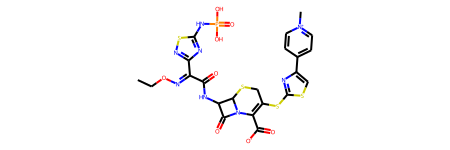

In [24]:
mol

In [46]:
fp_df.to_csv("../processed_data/drug_fingerprints.csv", index=False)

In [47]:
morgan_fp

'00100100000000100100001000000001110001011000000001000000000000000000000000000000100010000000000000000000000001000000110100101001100010001011010000000001001000100101000000000000000100010010000010100000001110010000011000100000000000000101000011110000110001010000000100000100100000101000100000000111000001101010100000100101010000000000000001000000100100000000100000000000000000000010010001111100010000000000000000001010010000010001100100010000100000000000001010000001000010110000000000001011000100011000000000010000'

In [36]:
r.fingerprint

'00000371E07BFC02700000000000000000000000580162C000002C400000000010000001F800001E0414C820000C28E5DF06BF9997DC1018AC4337F77C8082F1A9710AB909D8B5B864D88A6CEAE0D1B1943008609602F8C9061000000A00000000000000000000000000000000000000000000'

# Compound representation

In [21]:
# antibiotics_data

In [22]:
# antibiotics_data["number of samples"].hist()

In [23]:
# an_matching = {a: a.split("_")[0] for a in antibiotics}
# len(an_matching)

In [37]:
an_matching

{'ciprofloxacin': 'ciprofloxacin',
 'meropenem': 'meropenem',
 'imipenem': 'imipenem',
 'cefepime': 'cefepime',
 'piperacillin-tazobactam': 'piperacillin-tazobactam',
 'ampicillin-amoxicillin': 'ampicillin-amoxicillin',
 'cotrimoxazole': 'cotrimoxazole',
 'ceftriaxone': 'ceftriaxone',
 'amoxicillin-clavulanic acid': 'amoxicillin-clavulanic acid',
 'levofloxacin': 'levofloxacin',
 'colistin': 'colistin',
 'tobramycin': 'tobramycin',
 'ceftazidime': 'ceftazidime',
 'amikacin': 'amikacin',
 'vancomycin': 'vancomycin',
 'ertapenem': 'ertapenem',
 'penicillin': 'penicillin',
 'linezolid': 'linezolid',
 'tigecycline': 'tigecycline',
 'clindamycin': 'clindamycin',
 'daptomycin': 'daptomycin',
 'erythromycin': 'erythromycin',
 'oxacillin': 'oxacillin',
 'rifampicin': 'rifampicin',
 'fusidic acid': 'fusidic acid',
 'gentamicin': 'gentamicin',
 'cefuroxime': 'cefuroxime',
 'cefazolin': 'cefazolin',
 'tetracycline': 'tetracycline',
 'teicoplanin': 'teicoplanin',
 'cefpodoxime': 'cefpodoxime',
 'f